# Proyecto Tutorial de Clasficador de Imagenes

# Organizando imagenes

In [4]:
import os
import shutil


data =  r"C:\Users\Andre\Downloads\dogs-vs-cats (1)\train\train"

# Crear carpetas si no existen
os.makedirs(os.path.join(data, 'cat'), exist_ok=True)
os.makedirs(os.path.join(data, 'dog'), exist_ok=True)

# Mover imágenes a sus respectivas carpetas
for filename in os.listdir(data):
    src = os.path.join(data, filename)
    if os.path.isfile(src):  # Solo mover archivos, no carpetas
        if filename.startswith('cat'):
            shutil.move(src, os.path.join(data, 'cat', filename))
        elif filename.startswith('dog'):
            shutil.move(src, os.path.join(data, 'dog', filename))

# Visualizando imagenes

# Visualizacion

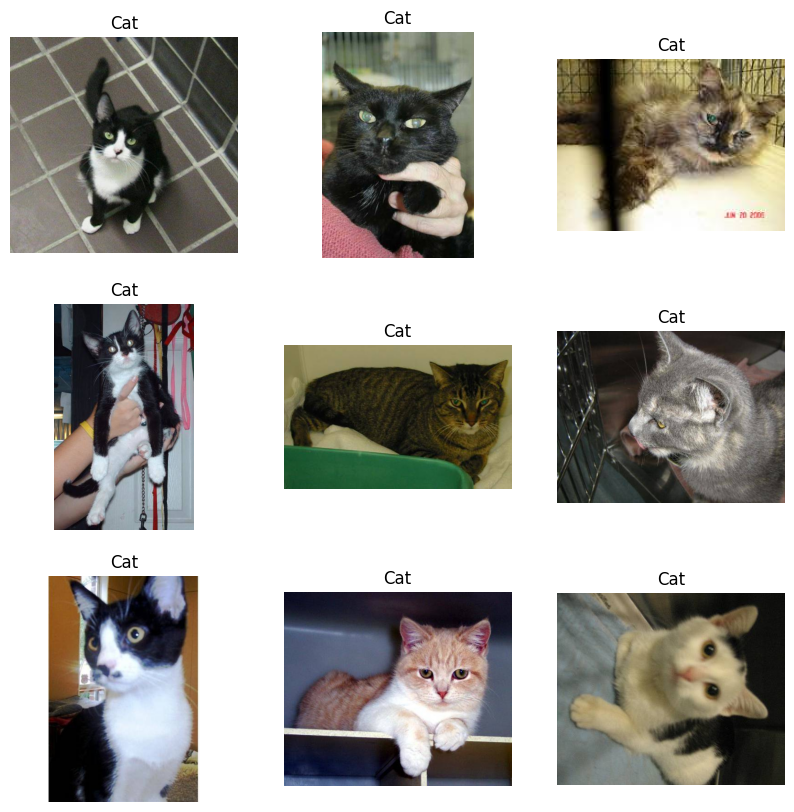

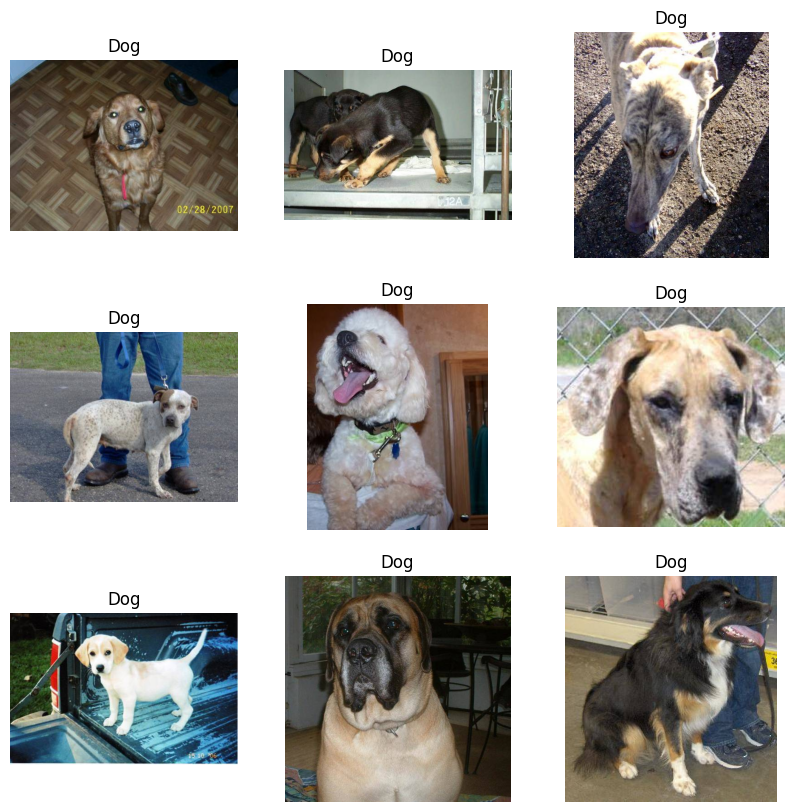

In [ ]:
#Visualizacion de imagenes

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

data = "/workspaces/machine-learning-python-linear-regression/dogs-vs-cats (1)/train/train"

# Mostrar 9 imágenes de gatos
cat_images = [f for f in os.listdir("/workspaces/machine-learning-python-linear-regression/dogs-vs-cats (1)/train/train/cat") if 'cat' in f][:9]
plt.figure(figsize=(10, 10))
for i, img_name in enumerate(cat_images):
    img_path = os.path.join("/workspaces/machine-learning-python-linear-regression/dogs-vs-cats (1)/train/train/cat", img_name)
    img = mpimg.imread(img_path)
    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title("Cat")
    plt.axis('off')
plt.show()

# Repetir con imágenes de perros
dog_images = [f for f in os.listdir("/workspaces/machine-learning-python-linear-regression/dogs-vs-cats (1)/train/train/dog") if 'dog' in f][:9]
plt.figure(figsize=(10, 10))
for i, img_name in enumerate(dog_images):
    img_path = os.path.join("/workspaces/machine-learning-python-linear-regression/dogs-vs-cats (1)/train/train/dog", img_name)
    img = mpimg.imread(img_path)
    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title("Dog")
    plt.axis('off')
plt.show()

# Redimensionando imagenes

In [7]:
import os
import cv2

#Gatos y perros -- Cambiar cat por dog para transformar las dos carpetas
input_folder = r"C:\Users\Andre\Downloads\dogs-vs-cats (1)\train\train\cat"
output_folder = input_folder  # Mismo folder
target_size = (180, 180)

# Procesar cada imagen
for filename in os.listdir(input_folder):
    if filename.lower().endswith((".jpg", ".jpeg", ".png")):
        img_path = os.path.join(input_folder, filename)
        img = cv2.imread(img_path)

        if img is None:
            print(f"No se pudo leer la imagen: {filename}")
            continue

        h, w = img.shape[:2]

        if (w, h) != target_size:
            resized_img = cv2.resize(img, target_size)
            print(f"Redimensionando: {filename} de ({w}, {h}) a {target_size}")
        else:
            resized_img = img
            print(f"Ya está en 640x640: {filename}")

        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, resized_img)


Redimensionando: cat.0.jpg de (200, 200) a (180, 180)
Redimensionando: cat.1.jpg de (200, 200) a (180, 180)
Redimensionando: cat.10.jpg de (200, 200) a (180, 180)
Redimensionando: cat.100.jpg de (200, 200) a (180, 180)
Redimensionando: cat.1000.jpg de (200, 200) a (180, 180)
Redimensionando: cat.10000.jpg de (200, 200) a (180, 180)
Redimensionando: cat.10001.jpg de (200, 200) a (180, 180)
Redimensionando: cat.10002.jpg de (200, 200) a (180, 180)
Redimensionando: cat.10003.jpg de (200, 200) a (180, 180)
Redimensionando: cat.10004.jpg de (200, 200) a (180, 180)
Redimensionando: cat.10005.jpg de (200, 200) a (180, 180)
Redimensionando: cat.10006.jpg de (200, 200) a (180, 180)
Redimensionando: cat.10007.jpg de (200, 200) a (180, 180)
Redimensionando: cat.10008.jpg de (200, 200) a (180, 180)
Redimensionando: cat.10009.jpg de (200, 200) a (180, 180)
Redimensionando: cat.1001.jpg de (200, 200) a (180, 180)
Redimensionando: cat.10010.jpg de (200, 200) a (180, 180)
Redimensionando: cat.10011.jp

In [ ]:
# Verificando que funcione Targeta grafica con tensorflow

In [32]:
import tensorflow as tf

# Mostrar versión de TensorFlow
print("Versión de TensorFlow:", tf.__version__)

# Verificar dispositivos disponibles
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("✅ GPU detectada:")
    for gpu in gpus:
        print(gpu)
else:
    print("❌ No se detectó GPU. Está usando CPU.")

Versión de TensorFlow: 2.10.1
✅ GPU detectada:
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


# Creando modelo

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(input_shape=(180, 180, 3), filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [3]:
import numpy as np
fake_input = np.zeros((1, 180, 180, 3))
output = model.predict(fake_input)
print("Shape after Flatten:", output.shape)  # Esto da (1, 18432)

2025-05-30 23:12:28.700230: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2025-05-30 23:12:32.177268: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2025-05-30 23:12:32.256606: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2025-05-30 23:12:32.256740: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2025-05-30 23:12:32.360836: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2025-05-30 23:12:32.361291: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2025-05-30 23:12:36.433781: I tensorflow/stream_executor/cuda/c

1/1 [==============================] - 12s 12s/step
Shape after Flatten: (1, 2)


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 90, 90, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 128)      0         
 2D)                                                    

In [5]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    '/mnt/c/Users/Andre/Downloads/dogs-vs-cats (1)/train/train',
    target_size=(180, 180),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/mnt/c/Users/Andre/Downloads/dogs-vs-cats (1)/train/train',
    target_size=(180,180),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [8]:
import time
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True, mode='max')
early = EarlyStopping(monitor='val_accuracy', patience=5)

start_time = time.time()  # Marca el inicio

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[checkpoint, early]
)

end_time = time.time()  # Marca el fin

elapsed_time = end_time - start_time  # Tiempo total en segundos

print(f"Tiempo total de entrenamiento: {elapsed_time:.2f} segundos")
print(f"Tiempo total de entrenamiento: {elapsed_time / 60:.2f} minutos")


Epoch 1/10


2025-05-30 23:16:26.537902: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.24GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-05-30 23:16:26.539772: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.24GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-05-30 23:16:26.539909: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.04GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-05-30 23:16:26.539931: W tensorflow/core/common_runtime/bfc_allocato

625/625 [==============================] - 686s 1s/step - loss: 0.6932 - accuracy: 0.4954 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
625/625 [==============================] - 275s 438ms/step - loss: 0.6932 - accuracy: 0.4969 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
625/625 [==============================] - 269s 431ms/step - loss: 0.6932 - accuracy: 0.5006 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
625/625 [==============================] - 272s 435ms/step - loss: 0.6932 - accuracy: 0.4969 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
625/625 [==============================] - 273s 436ms/step - loss: 0.6932 - accuracy: 0.4979 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
625/625 [==============================] - 268s 428ms/step - loss: 0.6932 - accuracy: 0.4979 - val_loss: 0.6931 - val_accuracy: 0.5000
Tiempo total de entrenamiento: 2044.78 segundos
Tiempo total de entrenamiento: 34.08 minutos


In [ ]:
# Optimizando modelo

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Guarda el mejor modelo basado en la precisión de validación
checkpoint = ModelCheckpoint(
    filepath='best_model.h5', 
    monitor='val_accuracy', 
    save_best_only=True, 
    mode='max',
    verbose=1
)

# Detiene el entrenamiento si la validación no mejora tras 5 epochs
early = EarlyStopping(
    monitor='val_accuracy', 
    patience=5, 
    restore_best_weights=True, 
    verbose=1
)

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True, mode='max')
early = EarlyStopping(monitor='val_accuracy', patience=5)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[checkpoint, early]
)

Epoch 1/10
625/625 [==============================] - 268s 428ms/step - loss: 0.6932 - accuracy: 0.5022 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 2/10
625/625 [==============================] - 250s 400ms/step - loss: 0.6933 - accuracy: 0.4949 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
625/625 [==============================] - 243s 389ms/step - loss: 0.6932 - accuracy: 0.4946 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
625/625 [==============================] - 247s 395ms/step - loss: 0.6932 - accuracy: 0.4963 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
625/625 [==============================] - 250s 399ms/step - loss: 0.6932 - accuracy: 0.4988 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
625/625 [==============================] - 253s 404ms/step - loss: 0.6932 - accuracy: 0.4967 - val_loss: 0.6932 - val_accuracy: 0.5000


In [28]:
## Mejor modelo Optimizado


In [30]:
#Por lo visto el modelo el modelo no tiene buena precision ni aun en la optimizacion. Mejorando algunas caracterizticas a la hora de crear el 
#el modelo podemos mejorar su acuracy. Existen redes neuronales CNN, mas robustos a la hora de hacer un clasificador de imagen como 
#las redes convulocionales.

In [19]:
import os

os.makedirs("modelo_final", exist_ok=True)

In [ ]:
#Guardamos el modelo

In [21]:
from tensorflow.keras.models import load_model
best_model = load_model("best_model.h5")


In [22]:
best_model.save("modelo_final/modelo_entrenado.h5")


In [6]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.utils import load_img, img_to_array
#import matplotlib.pyplot as plt

# ==== CONFIGURACIÓN ====
data_dir = data_dir = r"/mnt/c/Users/Andre/Downloads/dogs-vs-cats (1)/train/train" # Cambia esto por el path a tu dataset
img_height = 180
img_width = 100
batch_size = 16  # Puedes bajarlo si usas CPU o poca RAM

# ==== CARGA Y PREPROCESAMIENTO DE DATOS ====
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = train_ds.class_names
print("Clases detectadas:", class_names)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


2025-05-31 01:39:36.074239: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-31 01:39:36.130205: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-31 01:39:36.130274: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-31 01:39:36.132280: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the ap

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.
Clases detectadas: ['cat', 'dog']


In [8]:
# ==== MODELO CNN ====
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names))  # salida = número de clases
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 100, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 98, 32)       896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 89, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 47, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 43, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 41, 21, 128)      

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True, mode='max')
early = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [10]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[checkpoint, early]
)

Epoch 1/20


2025-05-31 01:43:03.913822: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2025-05-31 01:43:19.509630: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2025-05-31 01:43:19.600433: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2025-05-31 01:43:19.600574: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2025-05-31 01:43:19.680804: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2025-05-31 01:43:19.682124: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2025-05-31 01:43:27.211212: I tensorflow/stream_executor/cuda/c

1250/1250 [==============================] - 59s 18ms/step - loss: 0.6789 - accuracy: 0.5710 - val_loss: 0.6367 - val_accuracy: 0.6360
Epoch 2/20
1250/1250 [==============================] - 23s 18ms/step - loss: 0.5732 - accuracy: 0.7003 - val_loss: 0.5331 - val_accuracy: 0.7338
Epoch 3/20
1250/1250 [==============================] - 21s 17ms/step - loss: 0.4807 - accuracy: 0.7683 - val_loss: 0.5151 - val_accuracy: 0.7492
Epoch 4/20
1250/1250 [==============================] - 21s 17ms/step - loss: 0.3950 - accuracy: 0.8222 - val_loss: 0.5079 - val_accuracy: 0.7724
Epoch 5/20
1250/1250 [==============================] - 22s 17ms/step - loss: 0.2903 - accuracy: 0.8728 - val_loss: 0.6405 - val_accuracy: 0.7712
Epoch 6/20
1250/1250 [==============================] - 21s 16ms/step - loss: 0.1844 - accuracy: 0.9248 - val_loss: 0.8608 - val_accuracy: 0.7678
Epoch 7/20
1250/1250 [==============================] - 21s 16ms/step - loss: 0.1182 - accuracy: 0.9543 - val_loss: 1.0271 - val_accura

In [ ]:
# Guardar modelo

In [11]:
checkpoint = ModelCheckpoint("ModelOptimizado.h5", monitor='val_accuracy', save_best_only=True, mode='max')

In [12]:
model.save("modelo_final/ModelOptimizad.h5")


In [ ]:
# Metricas

In [15]:
from tensorflow.keras.models import load_model
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# 1. Cargar modelo
model = load_model("modelo_final/ModelOptimizad.h5")

# 2. Obtener etiquetas verdaderas y predicciones
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# 3. Calcular matriz de confusión
cm = confusion_matrix(y_true, y_pred)
print("Matriz de confusión:")
print(cm)

# 4. Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_true, y_pred, target_names=class_names))

1/1 [==============================] - 0s 26ms/step
Matriz de confusión:
[[1923  539]
 [ 599 1939]]
Reporte de clasificación:
              precision    recall  f1-score   support

         cat       0.76      0.78      0.77      2462
         dog       0.78      0.76      0.77      2538

    accuracy                           0.77      5000
   macro avg       0.77      0.77      0.77      5000
weighted avg       0.77      0.77      0.77      5000



In [ ]:
# Como vemos el modelo lo hace razonablemente bien